<a href="https://colab.research.google.com/github/MariyamElsa/Skin-Cancer-Prediction-Model/blob/main/Skin_cancer_multiclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [ ]:
!pip uninstall tensorflow -q -y

!pip install tensorflow==2.9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 100.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 71.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 97.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 56.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffers-23.5.26
  Attempting uninstall: tensorf

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.0


# Load Modules

In [ ]:
import requests
from google.colab import drive
import os
import shutil
import zipfile
import pandas as pd
import cv2
import numpy as np
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from sklearn.utils import class_weight
from PIL import Image
from tqdm.notebook import tqdm

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Input, Concatenate

In [ ]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Dataset

In [ ]:
# Define the paths to the destination folders for extraction
extracted_folder1 = '/content/drive/MyDrive/Skin Cancer/images/imgs_part_1'
extracted_folder2 = '/content/drive/MyDrive/Skin Cancer/images/imgs_part_2'
extracted_folder3 = '/content/drive/MyDrive/Skin Cancer/images/imgs_part_3'

# Define the path to the existing combined dataset folder
combined_dataset_folder = '/content/drive/My Drive/Skin Cancer/mendely'
# Specify the path to the pickle file

In [ ]:
# # Only Run Once
# # Function to copy the contents of one folder to another
# def copy_folder_contents(source_folder, destination_folder):
#     for item in os.listdir(source_folder):
#         source_item = os.path.join(source_folder, item)
#         destination_item = os.path.join(destination_folder, item)
#         if os.path.isdir(source_item):
#             shutil.copytree(source_item, destination_item)
#         else:
#             shutil.copy2(source_item, destination_item)

# # Copy the contents of the first dataset folder to the combined dataset folder
# copy_folder_contents(extracted_folder1, combined_dataset_folder)

# # Copy the contents of the second dataset folder to the combined dataset folder
# copy_folder_contents(extracted_folder2, combined_dataset_folder)

# # Copy the contents of the second dataset folder to the combined dataset folder
# copy_folder_contents(extracted_folder3, combined_dataset_folder)

In [ ]:
#path that contains folder you want to copy
%cd /content/drive/My Drive/Skin Cancer/
%cp -r mendely /content/mendely/
%cd /content/

/content/drive/My Drive/Skin Cancer
/content


In [ ]:
combined_dataset_folder = '/content/mendely'

In [ ]:
# Function to count the number of images in a folder
def count_images_in_folder(folder_path):
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']
    image_count = 0

    for item in os.listdir(folder_path):
        item_path = os.path.join(folder_path, item)
        if os.path.isfile(item_path):
            _, extension = os.path.splitext(item_path)
            if extension.lower() in image_extensions:
                image_count += 1

    return image_count

# Count the number of images in the combined dataset folder
total_images = count_images_in_folder(combined_dataset_folder)
print("Total number of images in the 'combined_dataset' folder:", total_images)

Total number of images in the 'combined_dataset' folder: 2298


In [ ]:
# Load the dataset
metadata = pd.read_csv('metadata.csv')

# Data Preprocessing

In [ ]:
# checking missing values
metadata.isna().sum()

patient_id               0
lesion_id                0
smoke                  804
drink                  804
background_father      818
background_mother      822
age                      0
pesticide              804
gender                 804
skin_cancer_history    804
cancer_history         804
has_piped_water        804
has_sewage_system      804
fitspatrick            804
region                   0
diameter_1             804
diameter_2             804
diagnostic               0
itch                     0
grew                     0
hurt                     0
changed                  0
bleed                    0
elevation                0
img_id                   0
biopsed                  0
dtype: int64

In [ ]:
# Checking Duplicates
duplicate_ids = metadata[metadata.duplicated(subset='patient_id')]
print(f"There are {duplicate_ids.shape[0]} duplicate patient ID's in the dataframe.")

There are 925 duplicate patient ID's in the dataframe.


In [ ]:
# Removing Duplicates
metadata = metadata.drop_duplicates(subset='patient_id', keep='first')
metadata = metadata.reset_index(drop=True)

In [ ]:
# Checking columns with UNK value
columns_with_unk = []

for column in metadata.columns:
    if 'UNK' in metadata[column].values:
        columns_with_unk.append(column)

print("Columns with 'UNK' values:", columns_with_unk)
# Replaocing UNK with False
metadata.replace('UNK', 'False', inplace=True)

Columns with 'UNK' values: ['background_father', 'background_mother', 'itch', 'grew', 'hurt', 'changed', 'bleed', 'elevation']


<ipython-input-18-472817d40d6f>:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if 'UNK' in metadata[column].values:


In [ ]:
# Fill missing values in 'skin_cancer_history' with the mode
metadata['skin_cancer_history'] = metadata['skin_cancer_history'].fillna(metadata['skin_cancer_history'].mode()[0])

# Fill missing values in 'diameter_1' and 'diameter_2' with the mean
metadata['diameter_1'] = metadata['diameter_1'].fillna(metadata['diameter_1'].mean())
metadata['diameter_2'] = metadata['diameter_2'].fillna(metadata['diameter_2'].mean())

In [ ]:
metadata.head(5)

,patient_id,lesion_id,smoke,drink,background_father,background_mother,age,pesticide,gender,skin_cancer_history,...,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed
0,PAT_1516,1765,NaN,NaN,NaN,NaN,8,NaN,NaN,False,...,8.558186,NEV,False,False,False,False,False,False,PAT_1516_1765_530.png,False
1,PAT_46,881,False,False,POMERANIA,POMERANIA,55,False,FEMALE,True,...,5.000000,BCC,True,True,False,True,True,True,PAT_46_881_939.png,True
2,PAT_1545,1867,NaN,NaN,NaN,NaN,77,NaN,NaN,False,...,8.558186,ACK,True,False,False,False,False,False,PAT_1545_1867_547.png,False
3,PAT_1989,4061,NaN,NaN,NaN,NaN,75,NaN,NaN,False,...,8.558186,ACK,True,False,False,False,False,False,PAT_1989_4061_934.png,False
4,PAT_684,1302,False,True,POMERANIA,POMERANIA,79,False,MALE,True,...,5.000000,BCC,True,True,False,False,True,True,PAT_684_1302_588.png,True


# EDA

In [ ]:
df = metadata

<ipython-input-20-2becd9c0f01f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], kde=True)


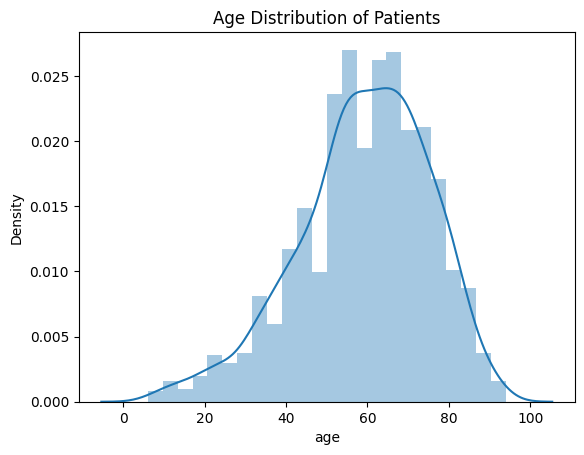

In [ ]:
sns.distplot(df['age'], kde=True)
plt.title('Age Distribution of Patients')
plt.show()

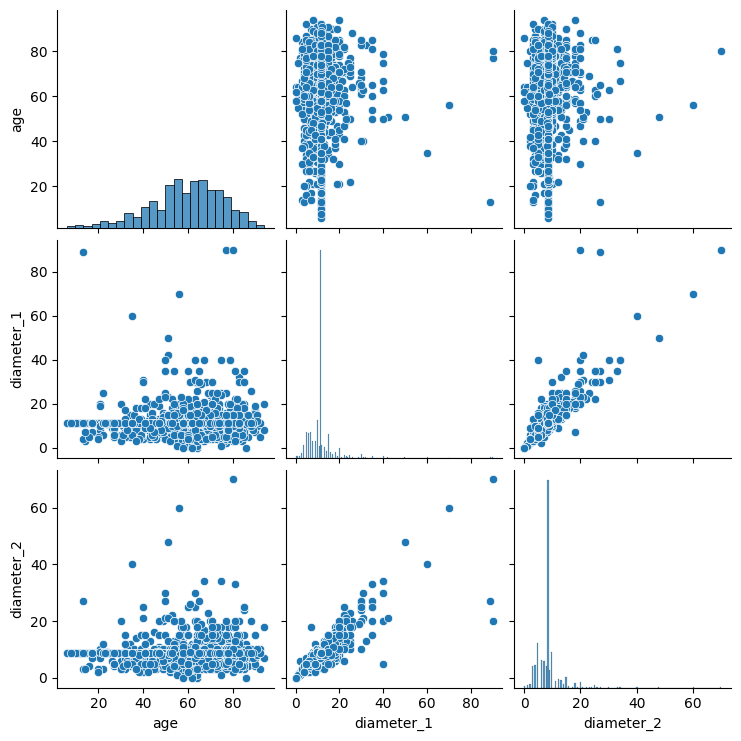

In [ ]:
sns.pairplot(df[['age', 'diameter_1', 'diameter_2']].dropna())  # dropna to handle missing values
plt.show()

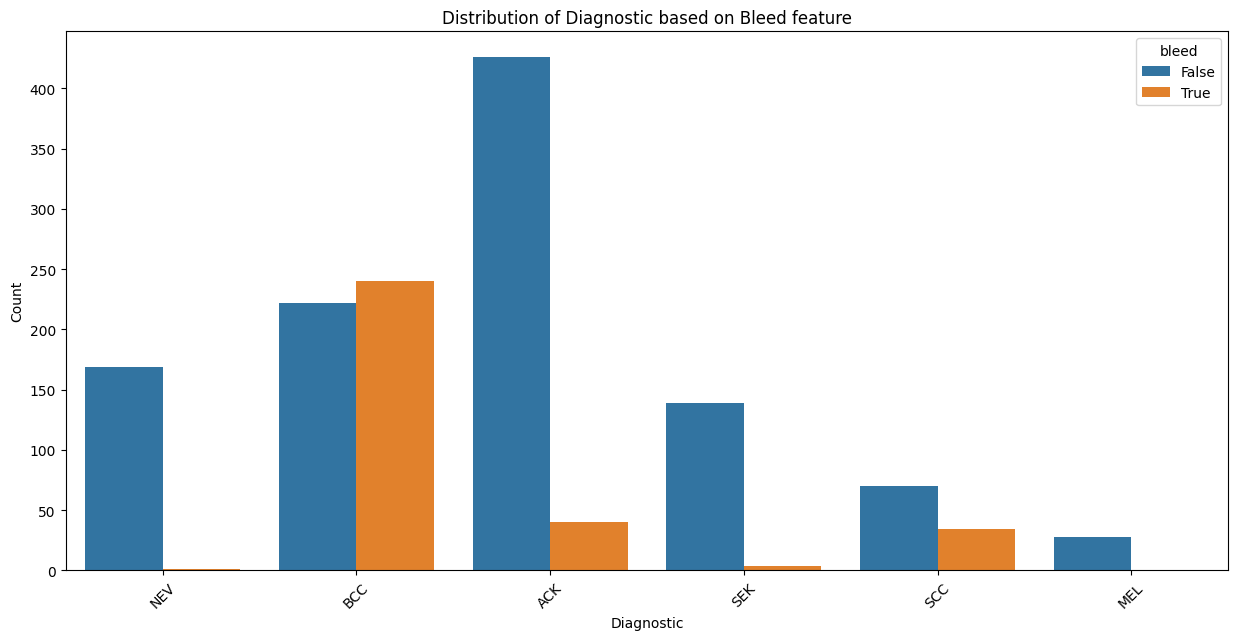

In [ ]:
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='diagnostic', hue='bleed')
plt.title('Distribution of Diagnostic based on Bleed feature')
plt.xlabel('Diagnostic')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

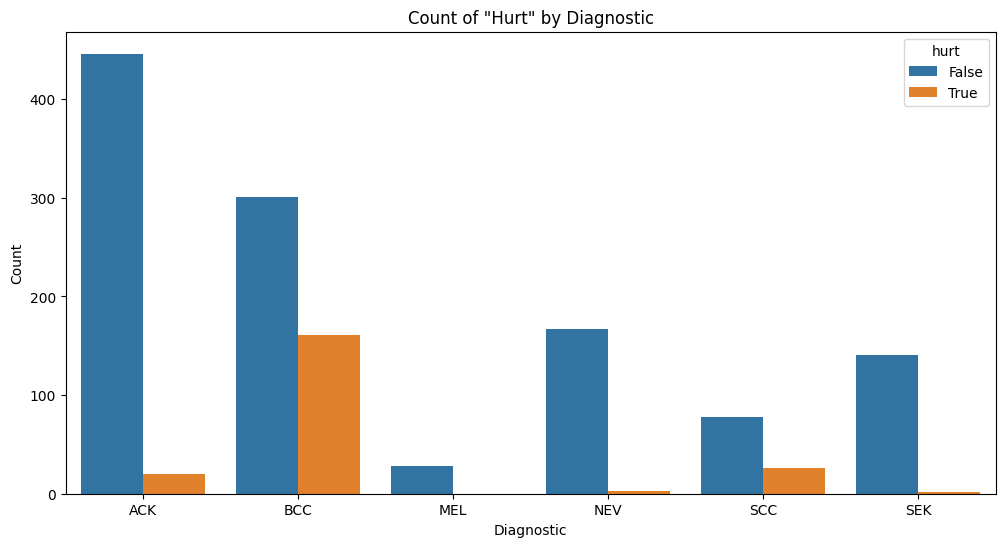

In [ ]:
# Group the data by 'diagnostic' and 'hurt' columns and count the occurrences
grouped_data = metadata.groupby(['diagnostic', 'hurt']).size().reset_index(name='count')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='diagnostic', y='count', hue='hurt')
plt.title('Count of "Hurt" by Diagnostic')
plt.ylabel('Count')
plt.xlabel('Diagnostic')
plt.show()

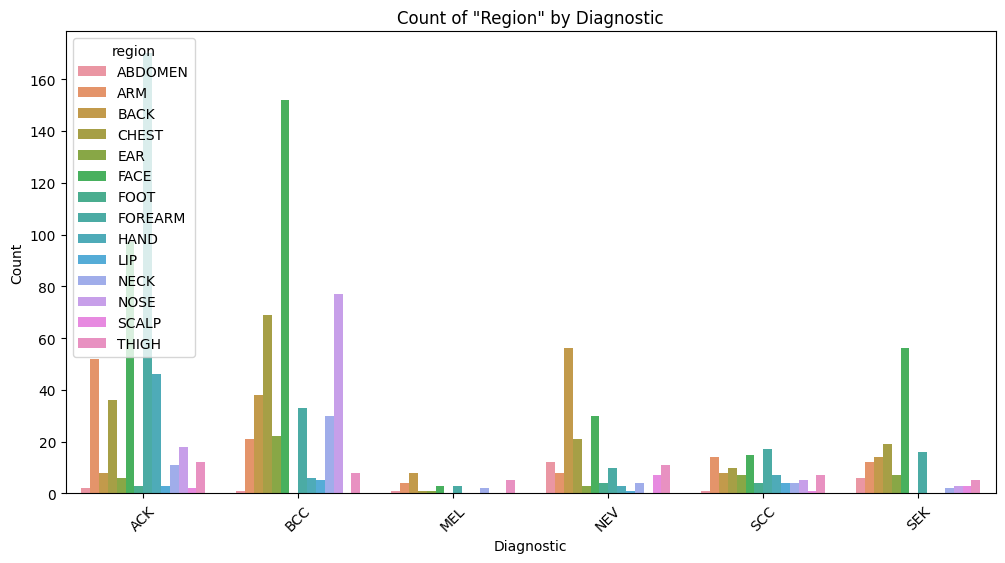

In [ ]:
# Group the data by 'diagnostic' and 'region' columns and count the occurrences
grouped_data = metadata.groupby(['diagnostic', 'region']).size().reset_index(name='count')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='diagnostic', y='count', hue='region')
plt.title('Count of "Region" by Diagnostic')
plt.ylabel('Count')
plt.xlabel('Diagnostic')
plt.xticks(rotation=45)
plt.show()

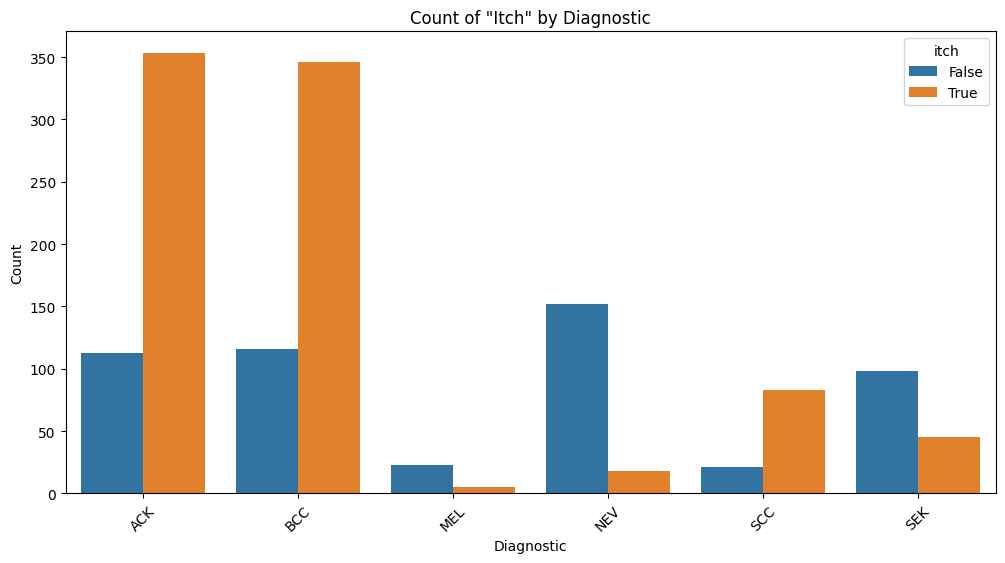

In [ ]:
# Group the data by 'diagnostic' and 'itch' columns and count the occurrences
grouped_data = metadata.groupby(['diagnostic', 'itch']).size().reset_index(name='count')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='diagnostic', y='count', hue='itch')
plt.title('Count of "Itch" by Diagnostic')
plt.ylabel('Count')
plt.xlabel('Diagnostic')
plt.xticks(rotation=45)
plt.show()

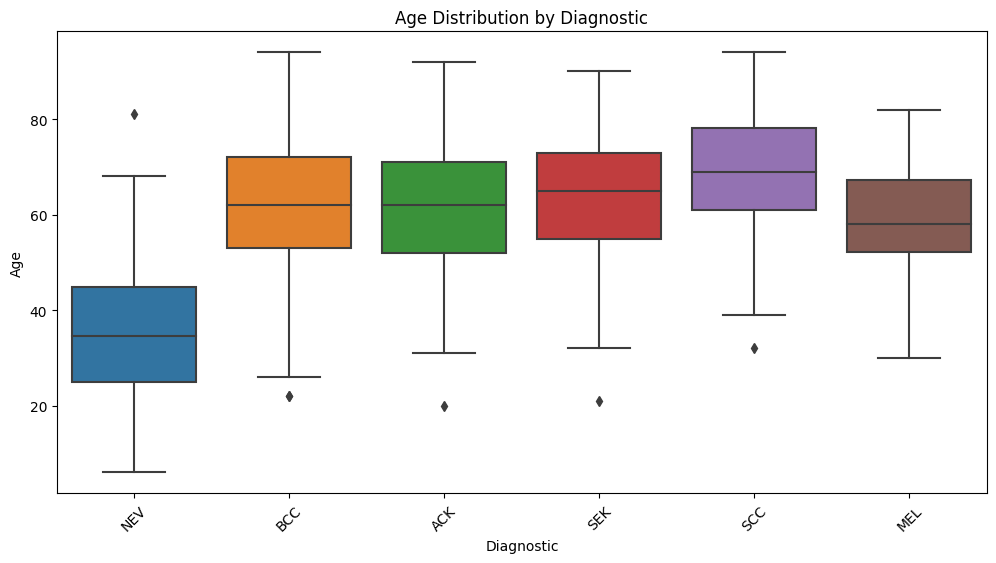

In [ ]:
# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=metadata, x='diagnostic', y='age')
plt.title('Age Distribution by Diagnostic')
plt.ylabel('Age')
plt.xlabel('Diagnostic')
plt.xticks(rotation=45)
plt.show()

# Model Training

In [ ]:
# Filter the metadata to include only the images present in the dataset
metadata_images = metadata['img_id'].apply(lambda x: os.path.exists(f'{combined_dataset_folder}/{x}'))
metadata = metadata[metadata_images]

In [ ]:
# Use LabelEncoder to transform the 'diagnostic' labels into integers
label_encoder = LabelEncoder()
metadata['diagnostic'] = label_encoder.fit_transform(metadata['diagnostic'])

In [ ]:
# Get the mapping from labels to integers
label_mapping = {label: index for index, label in enumerate(label_encoder.classes_)}

In [ ]:
label_mapping

{'ACK': 0, 'BCC': 1, 'MEL': 2, 'NEV': 3, 'SCC': 4, 'SEK': 5}

In [ ]:
class_distribution = metadata['diagnostic'].value_counts()
print(class_distribution)

1    845
0    730
3    244
5    235
4    192
2     52
Name: diagnostic, dtype: int64


In [ ]:
# Giving full form of labels
lesion_type = {
    'ACK': 'Actinic keratoses',
    'BCC': 'Basal cell carcinoma',
    'MEL': 'Melanoma',
    'NEV': 'Melanocytic nevi',
    'SCC': 'Squamous Cell Carcinoma',
    'SEK': 'VSeborrheic Keratosis'
}

In [ ]:
metadata['skin_cancer_history'] = metadata['skin_cancer_history'].map({'True': 1, 'False': 0})
metadata['changed'] = metadata['changed'].map({'True': 1, 'False': 0})
metadata['itch'] = metadata['itch'].map({'True': 1, 'False': 0})
metadata['grew'] = metadata['grew'].map({'True': 1, 'False': 0})
metadata['hurt'] = metadata['hurt'].map({'True': 1, 'False': 0})
metadata['bleed'] = metadata['bleed'].map({'True': 1, 'False': 0})
metadata['elevation'] = metadata['elevation'].map({'True': 1, 'False': 0})
metadata['changed'] = metadata['changed'].map({'True': 1, 'False': 0})

In [ ]:
# Split the data into a training set and a validation set
train_data, val_data = train_test_split(metadata, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

In [ ]:
# Define a function to load and preprocess images
def load_and_preprocess_image(image_path, img_size=(224, 224)):
    # Load the image
    img = load_img(image_path, target_size=img_size)
    # Convert the image to an array
    img = img_to_array(img)
    return img

In [ ]:
# Load and preprocess the images in the training set
train_images = np.array([load_and_preprocess_image(f'{combined_dataset_folder}/{img_id}') for img_id in train_data['img_id']])
train_labels = to_categorical(train_data['diagnostic'].values)

# Load and preprocess the images in the validation set
val_images = np.array([load_and_preprocess_image(f'{combined_dataset_folder}/{img_id}') for img_id in val_data['img_id']])
val_labels = to_categorical(val_data['diagnostic'].values)

In [ ]:
# Fit the datagen object to your training data
datagen.fit(train_images)

In [ ]:
patient_features = ['age', 'skin_cancer_history', 'itch', 'grew', 'hurt', 'changed', 'bleed', 'elevation', 'diameter_1', 'diameter_2']

In [ ]:
# Load and preprocess the patient data
# Fill NaN values with 0
train_data[patient_features] = train_data[patient_features].fillna(0).astype(int)
val_data[patient_features] = val_data[patient_features].fillna(0).astype(int)

# Apply the StandardScaler
scaler = StandardScaler()
train_patient_data = scaler.fit_transform(train_data[patient_features].values)
val_patient_data = scaler.transform(val_data[patient_features].values)

In [ ]:
!pip install joblib

In [ ]:
import joblib

# Save the scaler to a file
joblib.dump(scaler, '/content/drive/My Drive/Skin Cancer/scaler.pkl')

['/content/drive/My Drive/Skin Cancer/scaler.pkl']

In [ ]:
from sklearn.utils import class_weight

labels = train_data['diagnostic'].values

sample_weights = class_weight.compute_sample_weight(class_weight='balanced', y=labels)
class_weights = {i: weight for i, weight in enumerate(np.unique(sample_weights))}

In [ ]:
# Load the EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Define the patient data input
patient_data_input = Input(shape=(10,))

# Define the patient data sub-model
patient_data_model = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(patient_data_input)
patient_data_model = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(patient_data_model)

# Flatten the output of the base model
flattened_output = Flatten()(base_model.output)

# Define the combined model
combined_output = Concatenate()([flattened_output, patient_data_model])
combined_output = Dense(len(label_encoder.classes_), activation='softmax')(combined_output)

# Create the combined model
combined_model = Model(inputs=[base_model.input, patient_data_input], outputs=combined_output)

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Compile the combined model
combined_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
combined_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_3 (Rescaling)        (None, 224, 224, 3)  0           ['input_7[0][0]']                
                                                                                                  
 normalization_3 (Normalization  (None, 224, 224, 3)  7          ['rescaling_3[0][0]']            
 )                                                                                                
                                                                                            

In [ ]:
def multiple_inputs_gen(image_datagen, X1, X2, y, batch_size):
    genX1 = image_datagen.flow(X1, y, batch_size=batch_size, seed=1)
    genX2 = image_datagen.flow(X1, X2, batch_size=batch_size, seed=1)
    while True:
        X1i = genX1.next()
        X2i = genX2.next()
        yield [X1i[0], X2i[1]], X1i[1]  # Yield [image, other features] and label

# Create the generator
train_gen = multiple_inputs_gen(datagen, train_images, train_patient_data, train_labels, batch_size=10)

In [ ]:
# Train the model
combined_model.fit(train_gen,
                   steps_per_epoch=len(train_images) // 10,
                   validation_data=([val_images, val_patient_data], val_labels),
                   epochs=20,
                   class_weight=class_weights)

Epoch 1/20
183/183 [==============================] - 83s 392ms/step - loss: 12.4745 - accuracy: 0.3224 - val_loss: 8.2218 - val_accuracy: 0.3783
Epoch 2/20
183/183 [==============================] - 46s 251ms/step - loss: 9.9995 - accuracy: 0.4305 - val_loss: 7.9977 - val_accuracy: 0.4435
Epoch 3/20
183/183 [==============================] - 50s 276ms/step - loss: 10.2122 - accuracy: 0.4579 - val_loss: 7.2700 - val_accuracy: 0.5022
Epoch 4/20
183/183 [==============================] - 43s 235ms/step - loss: 8.9138 - accuracy: 0.5153 - val_loss: 9.8933 - val_accuracy: 0.4109
Epoch 5/20
183/183 [==============================] - 45s 249ms/step - loss: 8.1431 - accuracy: 0.5268 - val_loss: 8.7411 - val_accuracy: 0.5283
Epoch 6/20
183/183 [==============================] - 48s 265ms/step - loss: 7.9761 - accuracy: 0.5793 - val_loss: 6.6567 - val_accuracy: 0.6022
Epoch 7/20
183/183 [==============================] - 47s 259ms/step - loss: 7.0272 - accuracy: 0.5941 - val_loss: 7.8083 - val_

In [ ]:
combined_model.save('/content/drive/My Drive/Skin Cancer/mendely_model.h5')

# Image Model

In [ ]:
!find '/content/mendely/' -name "aug" -exec rm -rf {} \;

In [ ]:
df = pd.read_csv('metadata.csv')

In [ ]:
metadata=df

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define the data augmentation parameters
  datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

# Select the images from the 'NEV' class
nev_images = metadata[metadata['diagnostic'] == 'MEL']['img_id'].values

# Define the directory where the original images are located
image_dir = "/content/mendely/"

# Define the directory where the augmented images should be saved
augmented_dir = "/content/mendely_augmented"

# Create the augmented images directory if it doesn't exist
if not os.path.exists(augmented_dir):
    os.makedirs(augmented_dir)

# Perform augmentation for each image
for image_name in nev_images:
    # Load the image
    img_path = os.path.join(image_dir, image_name)  # Correct the file extension here
    img = load_img(img_path)  # Load the image as a PIL image
    x = img_to_array(img)  # Convert the PIL image to a numpy array
    x = x.reshape((1,) + x.shape)  # Reshape the image to (1, height, width, channels)

    # Perform augmentation and save the augmented images
    i = 0
    for batch in datagen.flow(x, batch_size=1, save_to_dir=augmented_dir, save_prefix='aug', save_format='png'):
        i += 1
        if i >= 5:  # Save 5 augmented images for each original image
            break

In [ ]:
import pandas as pd
import os

# Define the directory where the augmented images are saved
augmented_dir = "/content/mendely_augmented"

# Get the list of augmented image filenames
augmented_images = os.listdir(augmented_dir)

# Remove the file extension from the image filenames
augmented_images = [image[:-4] for image in augmented_images]

# Create a dataframe for the augmented images with the same columns as the original dataframe
augmented_df = pd.DataFrame(columns=metadata.columns)

# Set the 'img_id' column to the augmented image filenames
augmented_df['img_id'] = augmented_images

# Set the 'diagnostic' column to 'NEV' for all augmented images
augmented_df['diagnostic'] = 'NEV'

# Append the augmented dataframe to the original dataframe
metadata = pd.concat([metadata, augmented_df], ignore_index=True)

# Shuffle the dataframe
metadata = metadata.sample(frac=1).reset_index(drop=True)

# Save the updated dataframe
metadata.to_csv('updated_metadata.csv', index=False)

In [ ]:
import os

combined_dir = '/content/mendely/'
os.makedirs(combined_dir, exist_ok=True)

In [ ]:
augmented_images_dir = '/content/mendely_augmented'

In [ ]:
# Move the augmented images to the combined directory
for image in os.listdir(augmented_images_dir):
    shutil.move(os.path.join(augmented_images_dir, image), os.path.join(combined_dir, image))

In [ ]:
metadata['diagnostic'].value_counts()

BCC    845
ACK    730
NEV    500
SEK    235
SCC    192
MEL     52
Name: diagnostic, dtype: int64

In [ ]:
df = pd.read_csv('updated_metadata.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2554 entries, 0 to 2553
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient_id           2298 non-null   object 
 1   lesion_id            2298 non-null   float64
 2   smoke                1494 non-null   object 
 3   drink                1494 non-null   object 
 4   background_father    1480 non-null   object 
 5   background_mother    1476 non-null   object 
 6   age                  2298 non-null   float64
 7   pesticide            1494 non-null   object 
 8   gender               1494 non-null   object 
 9   skin_cancer_history  1494 non-null   object 
 10  cancer_history       1494 non-null   object 
 11  has_piped_water      1494 non-null   object 
 12  has_sewage_system    1494 non-null   object 
 13  fitspatrick          1494 non-null   float64
 14  region               2298 non-null   object 
 15  diameter_1           1494 non-null   f

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout

datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    validation_split=0.2
)

# Specify the path to the directory containing the augmented images
augmented_dir = '/content/mendely/'

# Split the metadata into training and validation dataframes
train_df, val_df = train_test_split(metadata, test_size=0.2, stratify=metadata['diagnostic'], random_state=42)

batch_size = 32

# Apply data augmentation to training data
train_generator = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='/content/mendely/',
    x_col="img_id",
    y_col="diagnostic",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    seed=42
)

# Define the validation data generator (without augmentation)
validation_generator = datagen.flow_from_dataframe(
    dataframe=val_df,
    directory='/content/mendely/',
    x_col="img_id",
    y_col="diagnostic",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    seed=42
)

# Define CNN model with dropout layers
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // batch_size,
    epochs=20
)


Found 1843 validated image filenames belonging to 6 classes.
Found 455 validated image filenames belonging to 6 classes.


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:989: UserWarning: Found 200 invalid image filename(s) in x_col="img_id". These filename(s) will be ignored.
  warnings.warn('Found {} invalid image filename(s) in x_col="{}". '
/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:989: UserWarning: Found 56 invalid image filename(s) in x_col="img_id". These filename(s) will be ignored.
  warnings.warn('Found {} invalid image filename(s) in x_col="{}". '


Epoch 1/20
57/57 [==============================] - 112s 2s/step - loss: 2.4507 - accuracy: 0.3379 - val_loss: 1.6628 - val_accuracy: 0.3772
Epoch 2/20
57/57 [==============================] - 110s 2s/step - loss: 1.5159 - accuracy: 0.3683 - val_loss: 1.4354 - val_accuracy: 0.3728
Epoch 3/20
57/57 [==============================] - 114s 2s/step - loss: 1.4835 - accuracy: 0.4047 - val_loss: 1.4936 - val_accuracy: 0.4888
Epoch 4/20
57/57 [==============================] - 111s 2s/step - loss: 1.4273 - accuracy: 0.4445 - val_loss: 1.4189 - val_accuracy: 0.5000
Epoch 5/20
57/57 [==============================] - 112s 2s/step - loss: 1.3900 - accuracy: 0.4716 - val_loss: 1.3357 - val_accuracy: 0.4866
Epoch 6/20
57/57 [==============================] - 108s 2s/step - loss: 1.3433 - accuracy: 0.4832 - val_loss: 1.3110 - val_accuracy: 0.4978
Epoch 7/20
57/57 [==============================] - 109s 2s/step - loss: 1.3103 - accuracy: 0.4992 - val_loss: 1.2974 - val_accuracy: 0.4955
Epoch 8/20
57

In [ ]:
model.save('/content/drive/My Drive/Skin Cancer/image_model.h5')

import json

# Save the class_indices dictionary to a JSON file
with open('/content/drive/My Drive/Skin Cancer/class_indices.json', 'w') as f:
    json.dump(train_generator.class_indices, f)


# Validation

In [ ]:
import keras

In [ ]:
model = keras.models.load_model('/content/drive/My Drive/Skin Cancer/mendely_model.h5')

15/15 [==============================] - 3s 197ms/step


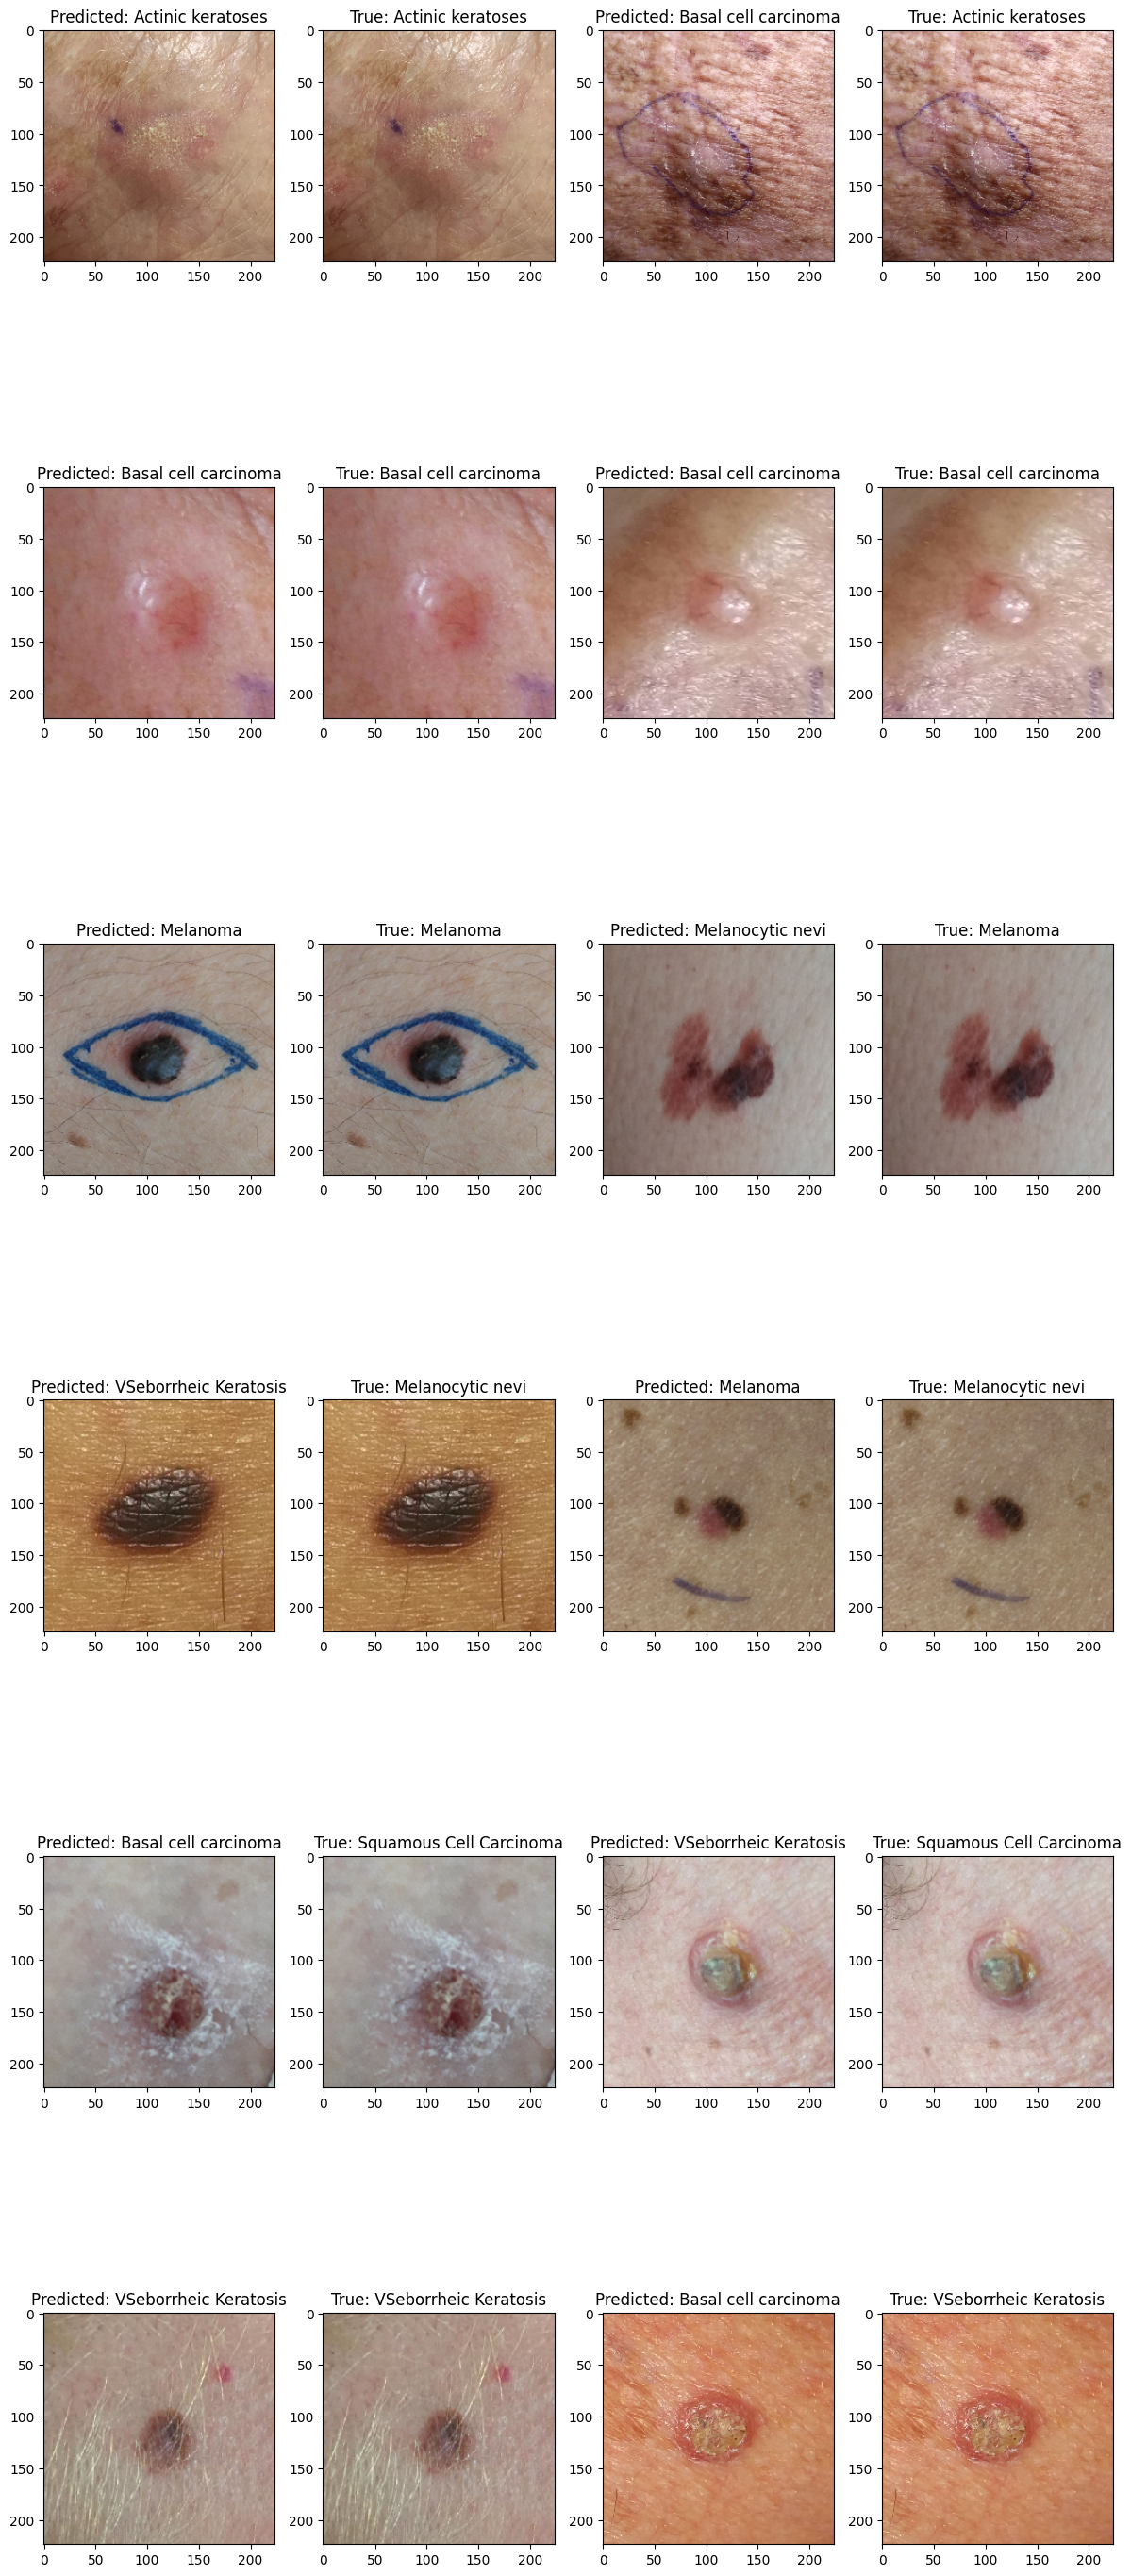

In [ ]:
# Updated Codeß
import matplotlib.pyplot as plt
import numpy as np

# Use the model to make predictions
predictions = model.predict([val_images, val_patient_data])

# Convert predictions from one-hot encoding to labels
predicted_labels = np.argmax(predictions, axis=-1)

# Convert the numeric labels back to original abbreviated labels
predicted_labels_abbrev = label_encoder.inverse_transform(predicted_labels)

# Convert abbreviated labels to full names
predicted_labels_full = [lesion_type[label] for label in predicted_labels_abbrev]

# Convert one-hot encoded labels to numeric labels
val_labels_numeric = np.argmax(val_labels, axis=-1)

# Convert the numeric labels back to original abbreviated labels
true_labels_abbrev = label_encoder.inverse_transform(val_labels_numeric)

# Convert abbreviated labels to full names
true_labels_full = [lesion_type[label] for label in true_labels_abbrev]

# Identify unique classes
unique_classes = np.unique(val_labels_numeric)

# Create a plot
fig, axes = plt.subplots(len(unique_classes), 4, figsize=(12, 30))

for i, label in enumerate(unique_classes):
    # Find the first two occurrences of the class in the validation set
    indices = np.where(val_labels_numeric == label)[0][:2]

    for j, index in enumerate(indices):
        # Extract the image and normalize it for display
        image = val_images[index]
        image_normalized = image.astype('float32') / 255

        # Display the image with the true and predicted labels
        axes[i, 2*j].imshow(image_normalized)
        axes[i, 2*j+1].imshow(image_normalized)
        axes[i, 2*j].set_title(f"Predicted: {lesion_type[predicted_labels_abbrev[index]]}")
        axes[i, 2*j+1].set_title(f"True: {lesion_type[true_labels_abbrev[index]]}")

plt.tight_layout()
plt.show()

15/15 [==============================] - 2s 111ms/step


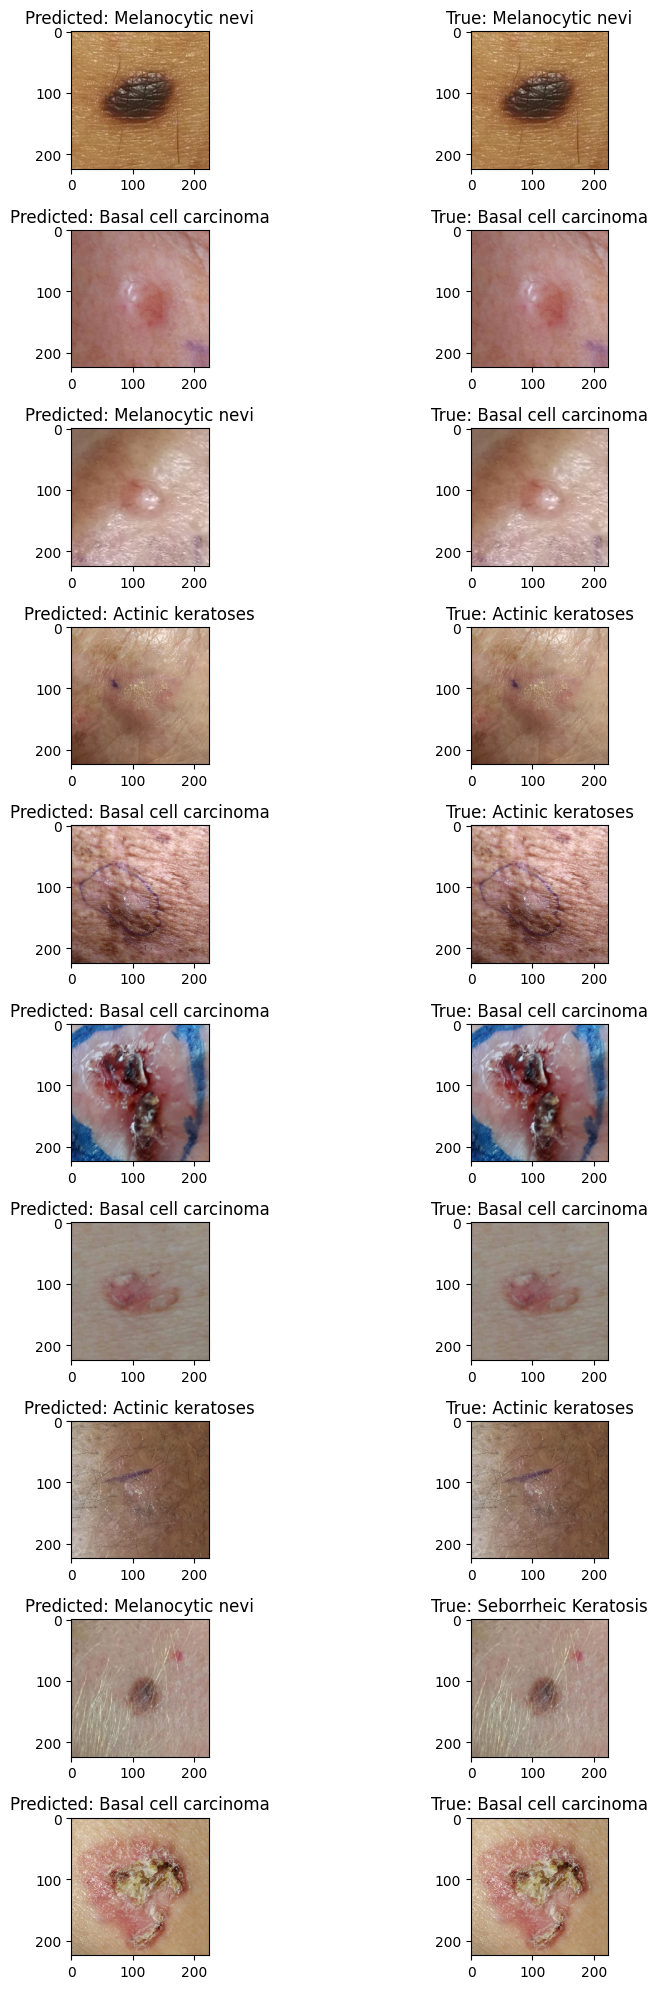

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Use the model to make predictions
predictions = model.predict([val_images, val_patient_data])

# Convert predictions from one-hot encoding to labels
predicted_labels = np.argmax(predictions, axis=-1)

# Convert the numeric labels back to original abbreviated labels
predicted_labels_abbrev = label_encoder.inverse_transform(predicted_labels)

# Convert abbreviated labels to full names
predicted_labels_full = [lesion_type[label] for label in predicted_labels_abbrev]

# Convert one-hot encoded labels to numeric labels
val_labels_numeric = np.argmax(val_labels, axis=-1)

# Convert the numeric labels back to original abbreviated labels
true_labels_abbrev = label_encoder.inverse_transform(val_labels_numeric)

# Convert abbreviated labels to full names
true_labels_full = [lesion_type[label] for label in true_labels_abbrev]

# Display the first 10 images, their predicted labels, and the true labels
fig, axes = plt.subplots(10, 2, figsize=(10, 20))

for i, ax in enumerate(axes):
    # Normalize the image to [0, 1]
    img_normalized = val_images[i].astype('float32') / 255

    # Display the image
    ax[0].imshow(img_normalized)
    ax[1].imshow(img_normalized)

    # Display the predicted label
    ax[0].set_title(f'Predicted: {predicted_labels_full[i]}')

    # Display the true label
    ax[1].set_title(f'True: {true_labels_full[i]}')

plt.tight_layout()
plt.show()

Accuracy: 0.6065217391304348
F1-score: 0.6023827403653338
Confusion Matrix:
[[111  14   0   1   5   2]
 [ 50  99   0   3  22   3]
 [  0   1   4   0   1   7]
 [  8   3   0  30   1   8]
 [ 20  11   0   1  11   1]
 [ 13   1   0   5   0  24]]


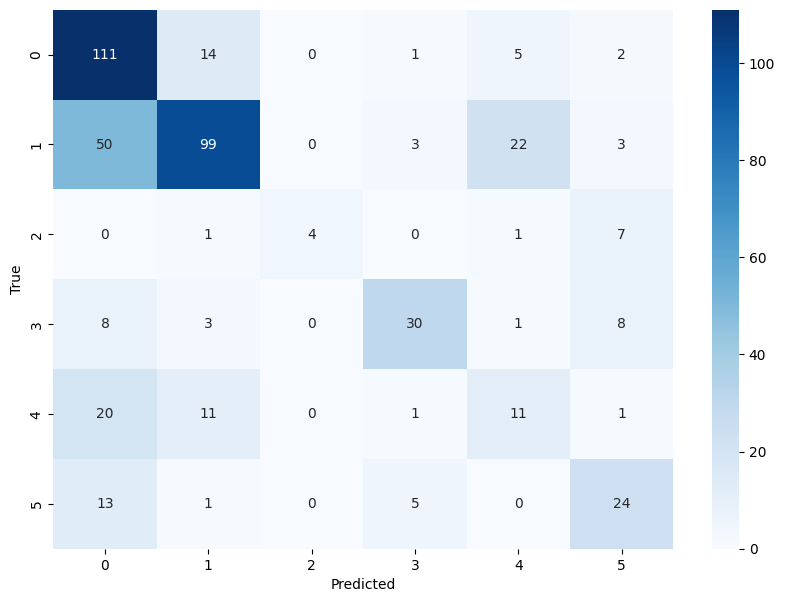

In [ ]:
# Get the true labels and predicted labels (replace these with your actual labels)
y_true = np.argmax(val_labels, axis=1)
y_pred = np.argmax(predictions, axis=1)

# Compute accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy}')

# Compute F1-score
f1 = f1_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multi-class problems
print(f'F1-score: {f1}')

# Compute confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(conf_mat)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

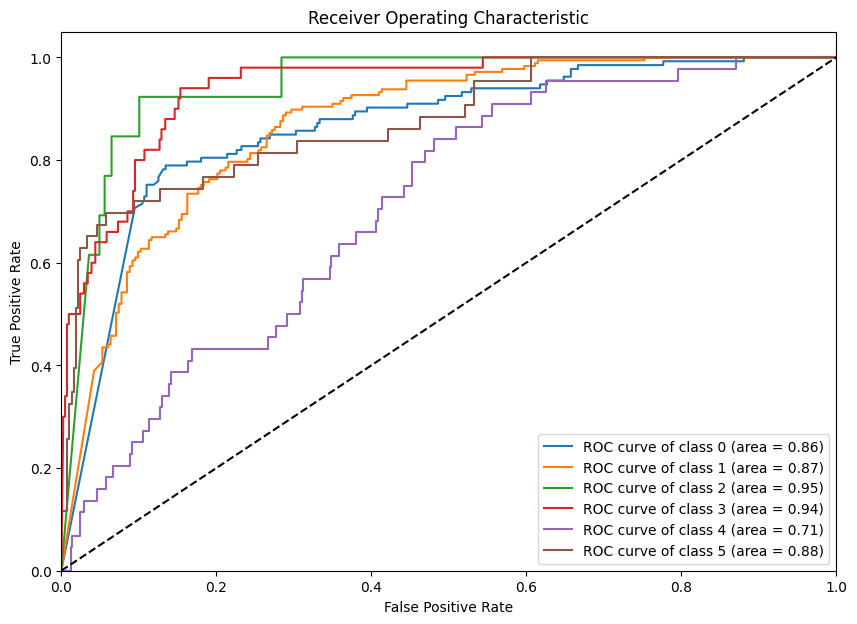

In [ ]:
# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes = val_labels.shape[1]
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true == i, predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve
plt.figure(figsize=(10, 7))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Testing

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import Image
import numpy as np
from google.colab import files
from io import BytesIO

In [ ]:
import json
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the previously trained model
model = load_model('/content/drive/My Drive/Skin Cancer/image_model.h5')

# Load the class_indices dictionary from the JSON file
with open('/content/drive/My Drive/Skin Cancer/class_indices.json', 'r') as f:
    class_indices = json.load(f)

# Create a reverse mapping dictionary by swapping the keys and values
reverse_mapping = {v: k for k, v in class_indices.items()}

# Load and preprocess the sample image
image_path = 'PAT_46_881_939.png'
image = load_img(image_path, target_size=(224, 224))  # Resize the image to match the input size of the model
image_array = img_to_array(image)  # Convert the image to a numpy array
image_array = image_array / 255.0  # Normalize the image to [0, 1]
image_array = np.expand_dims(image_array, axis=0)  # Add a batch dimension

patient_data = {
    'age': 32,
    'skin_cancer_history': 'False',
    'itch': 'False',
    'grew': 'False',
    'hurt': 'False',
    'changed': 'True',
    'bleed': 'False',
    'elevation': 'True',
    'diameter_1': 0,
    'diameter_2': 0
}

# Convert 'True' and 'False' to integers
for key, value in patient_data.items():
    if value == 'True':
        patient_data[key] = 1.0
    elif value == 'False':
        patient_data[key] = 0.0

features = np.array([list(patient_data.values())])


# Predict the class of the sample image
predictions = model.predict(image_array)
predicted_class = np.argmax(predictions, axis=1)

# Get the full form of the predicted class
lesion_type_dict = {
    'ACK': 'Actinic keratoses',
    'BCC': 'Basal cell carcinoma',
    'MEL': 'Melanoma',
    'NEV': 'Melanocytic nevi',
    'SCC': 'Squamous Cell Carcinoma',
    'SEK': 'Seborrheic Keratosis'
}

predicted_class_label = reverse_mapping[predicted_class[0]]
predicted_class_fullform = lesion_type_dict[predicted_class_label]

# Classify as cancerous or non-cancerous
cancerous_types = ['Basal cell carcinoma', 'Melanoma', 'Squamous Cell Carcinoma']
if predicted_class_fullform in cancerous_types:
    cancer_status = "Cancerous"
else:
    cancer_status = "Non-cancerous"

print(f'Predicted class: {predicted_class_fullform} ({cancer_status})')

1/1 [==============================] - 0s 79ms/step
Predicted class: Basal cell carcinoma (Cancerous)


# Testing - On Progress

In [ ]:
# Load model
model = load_model('/content/drive/My Drive/Skin Cancer/mendely_model.h5')

In [ ]:
# Load the scaler that was saved during training
scaler = joblib.load('/content/drive/My Drive/Skin Cancer/scaler.pkl')  # Assuming you saved it as 'scaler.pkl'

In [ ]:
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
import joblib

# Load and preprocess image
image_path = 'PAT_161_250_197.png'
image = Image.open(image_path).convert('RGB')
image = image.resize((224, 224))
image = img_to_array(image)
image = np.expand_dims(image, axis=0)
image = image / 255.0  # Normalize pixel values

# Patient features and preprocessing
# Replace with actual patient feature values
patient_data = {
    'age': 32,
    'skin_cancer_history': 'False',
    'itch': 'False',
    'grew': 'False',
    'hurt': 'False',
    'changed': 'True',
    'bleed': 'False',
    'elevation': 'True',
    'diameter_1': 0,
    'diameter_2': 0
}

# Convert 'True' and 'False' to integers
for key, value in patient_data.items():
    if value == 'True':
        patient_data[key] = 1.0
    elif value == 'False':
        patient_data[key] = 0.0

features = np.array([list(patient_data.values())])

features = scaler.transform(features)  # Use the loaded scaler to transform the features


# Make a prediction using your trained model
preds = model.predict([image, features])
predicted_class_index = np.argmax(preds[0])

# Load the LabelEncoder used during training
# For demonstration, we're creating a new one
label_encoder = LabelEncoder()
label_encoder.fit(['NEV', 'BCC', 'ACK', 'SEK', 'SCC', 'MEL'])
predicted_class_label = label_encoder.inverse_transform([predicted_class_index])[0]

# Get the full form of the predicted class
lesion_type_dict = {
    'ACK': 'Actinic keratoses',
    'BCC': 'Basal cell carcinoma',
    'MEL': 'Melanoma',
    'NEV': 'Melanocytic nevi',
    'SCC': 'Squamous Cell Carcinoma',
    'SEK': 'Seborrheic Keratosis'
}
predicted_class_fullform = lesion_type_dict[predicted_class_label]

print(predicted_class_fullform)

1/1 [==============================] - 0s 50ms/step
Seborrheic Keratosis
